In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import glob

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="outer")
    df["Significant"] = "No"
    return df

In [5]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
    return df_merged

In [6]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)


In [7]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "green"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)


In [8]:
glob.glob("../results/comparisons/DE__all__*/DE_edgeR/final_table.tsv")

['../results/comparisons/DE__all__Input_WAGO-1_P3G__IP_WAGO-1_P3G/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__IP_WAGO-3_dpf-3_null__IP_WAGO-3/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-3__IP_WAGO-3/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-1__IP_WAGO-1/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__IP_WAGO-1_dpf-3_null__IP_WAGO-1/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-4_dpf-3_null__IP_WAGO-4_dpf-3_null/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-4__IP_WAGO-4/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__IP_WAGO-4_dpf-3_null__IP_WAGO-4/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__IP_WAGO-1_P3G__IP_WAGO-1/DE_edgeR/final_table.tsv',
 '../results/comparisons/DE__all__Input_WAGO-3_dpf-3_null__IP_WAGO-3_dpf-

# Input files

In [9]:
IP_WAGO_1_vs_Input_WAGO_1 = "../results/comparisons/DE__all__Input_WAGO-1__IP_WAGO-1/DE_edgeR/final_table.tsv"
IP_WAGO_1_vs_Input_WAGO_1_name = "IP_WAGO_1_vs_Input_WAGO_1"

IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G = "../results/comparisons/DE__all__Input_WAGO-1_P3G__IP_WAGO-1_P3G/DE_edgeR/final_table.tsv"
IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G_name = "IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G"

IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null = "../results/comparisons/DE__all__Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null/DE_edgeR/final_table.tsv"
IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null_name = "IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null"


# FC plots

## IP_WAGO_1_vs_Input_WAGO_1 over IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G

,Significant
No,10826571
FDR_IP_WAGO_1_vs_Input_WAGO_1<0.05\nFDR_IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G<0.05,33371
FDR_IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G<0.05,16008
FDR_IP_WAGO_1_vs_Input_WAGO_1<0.05,15793


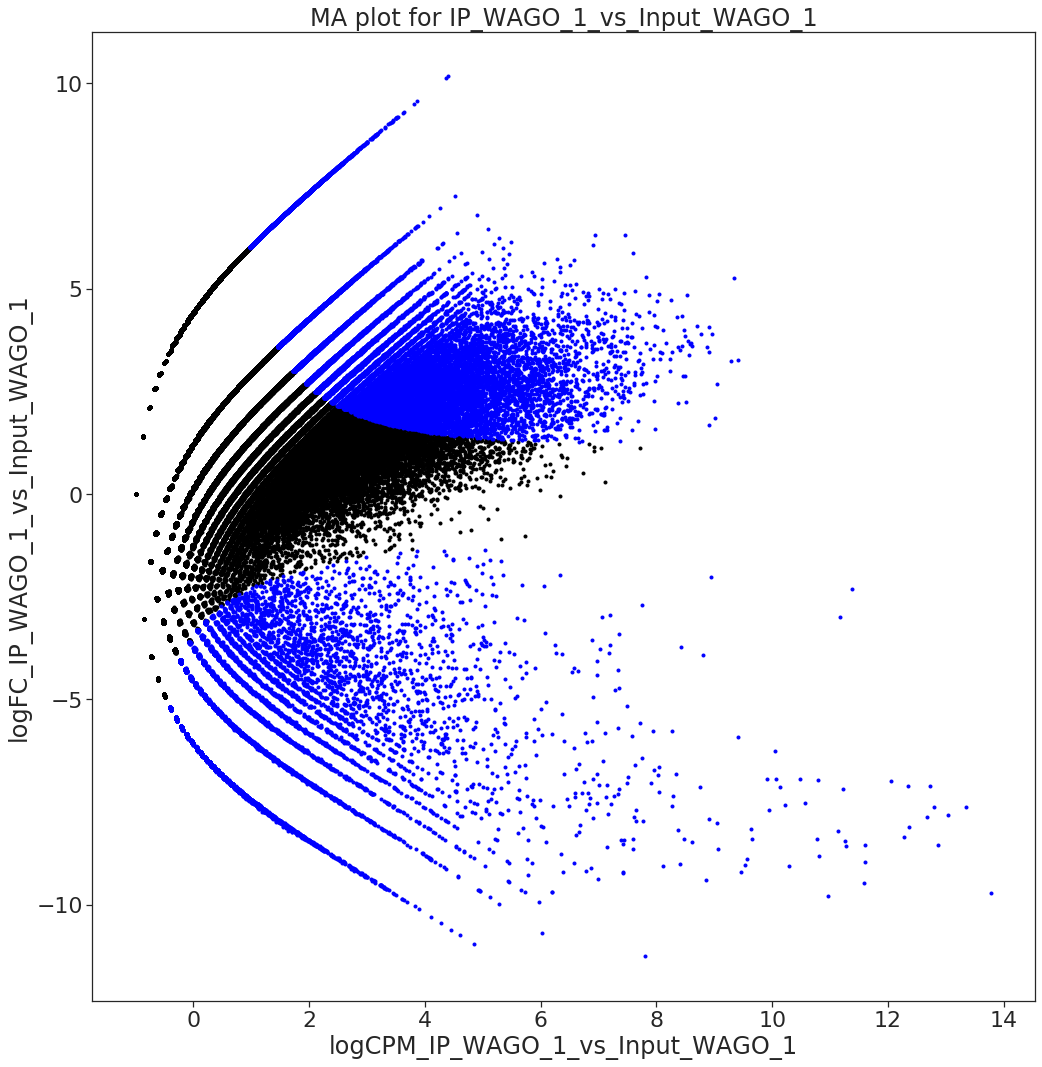

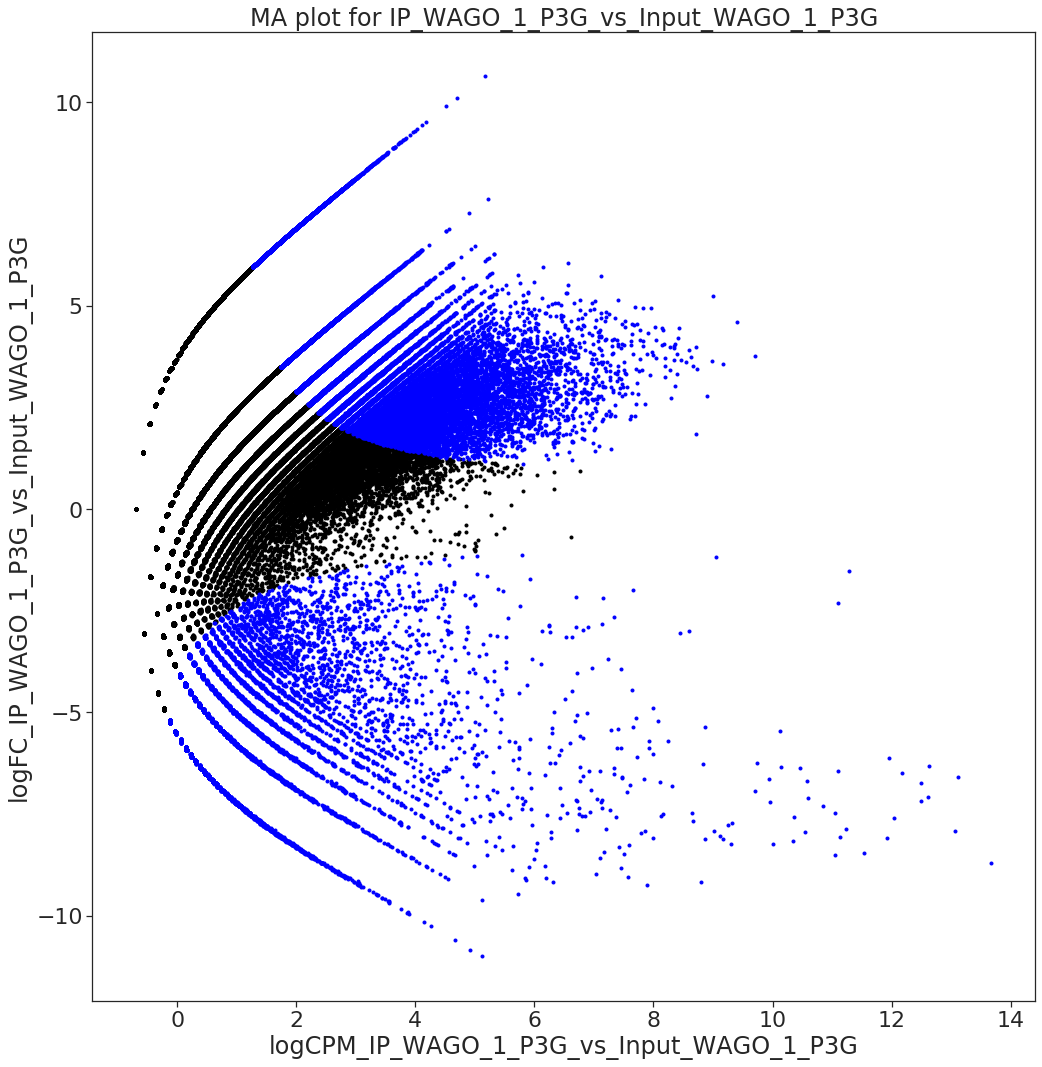

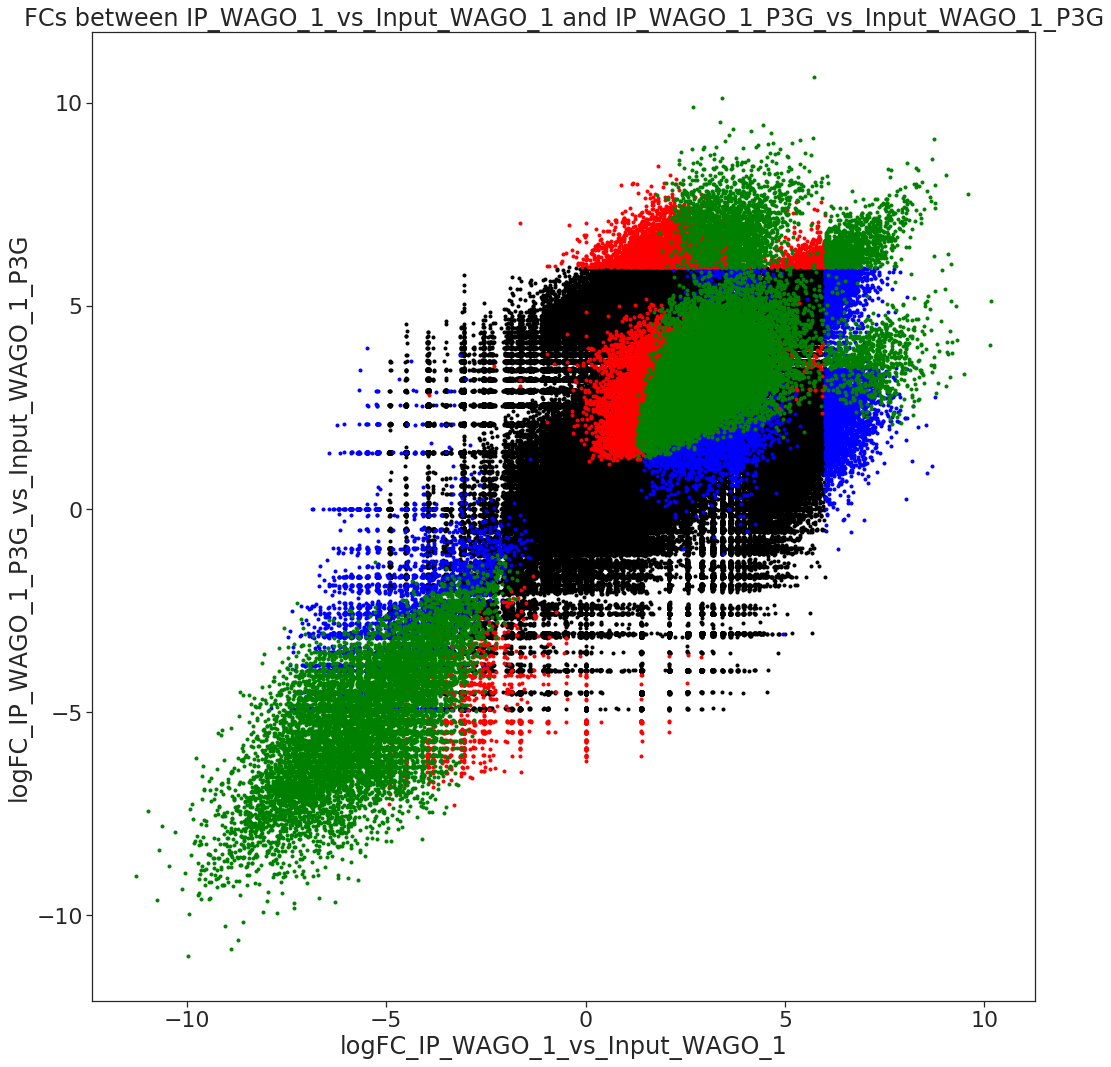

In [10]:
df_1_path = IP_WAGO_1_vs_Input_WAGO_1
df_1_name = IP_WAGO_1_vs_Input_WAGO_1_name

df_2_path = IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G
df_2_name = IP_WAGO_1_P3G_vs_Input_WAGO_1_P3G_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"


df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"


df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"FDR_{df_2_name}"]<0.05), 
           "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, hue="Significant", hue_order=["No", f"FDR_{df_1_name}<0.05", f"FDR_{df_2_name}<0.05", f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

pd.DataFrame(df_all["Significant"].value_counts())

## IP_WAGO_1_vs_Input_WAGO_1 over IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null

,Significant
No,10792989
FDR_IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null<0.05,49590
FDR_IP_WAGO_1_vs_Input_WAGO_1<0.05\nFDR_IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null<0.05,28330
FDR_IP_WAGO_1_vs_Input_WAGO_1<0.05,20834


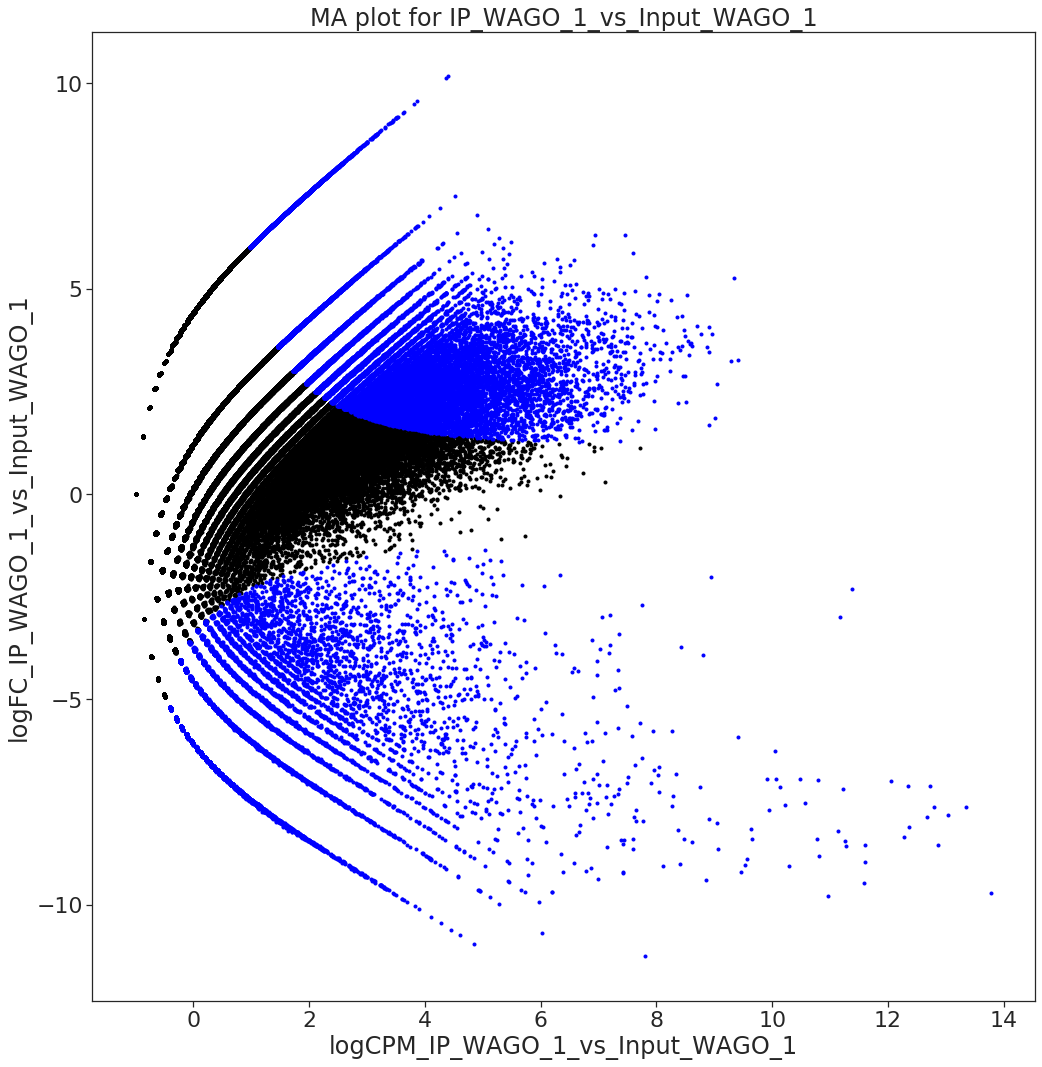

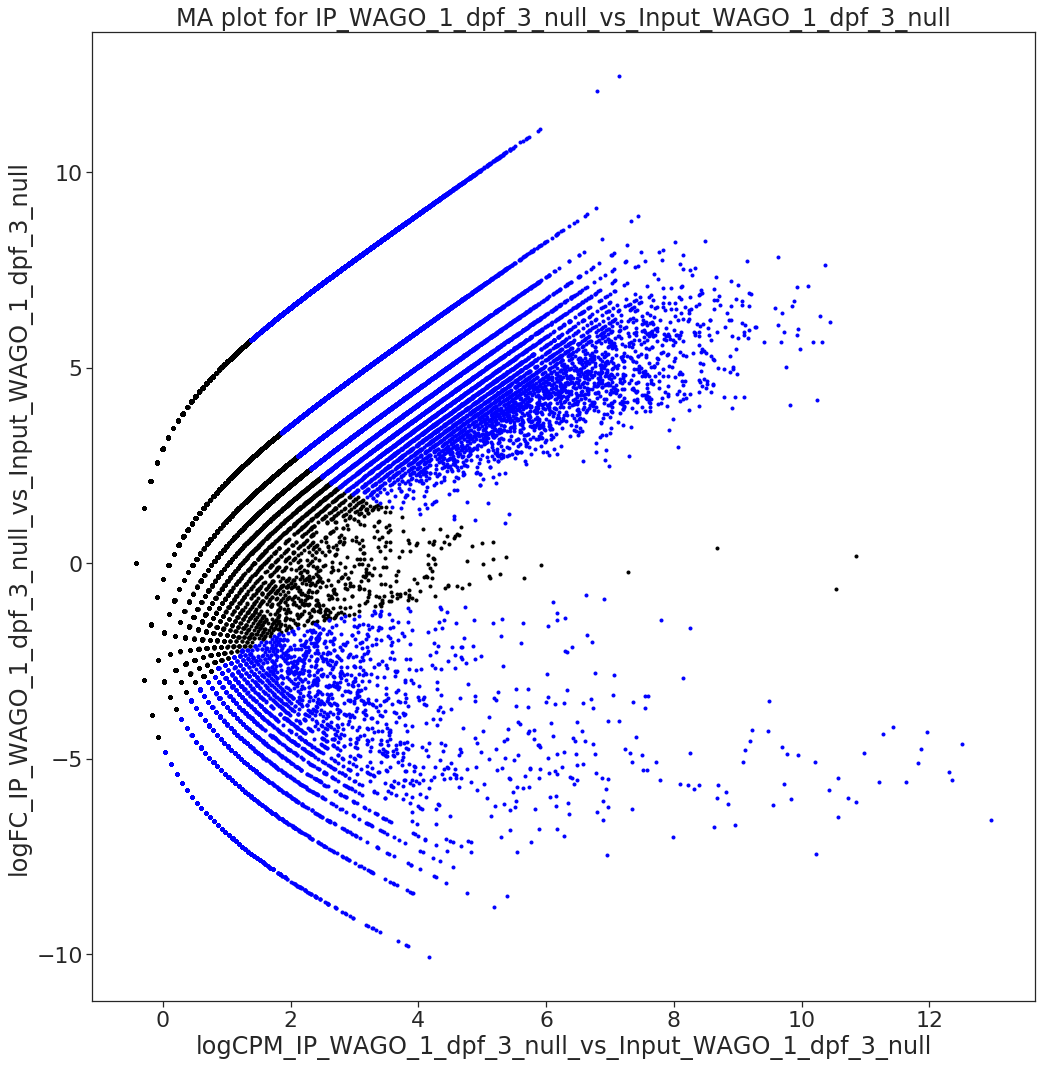

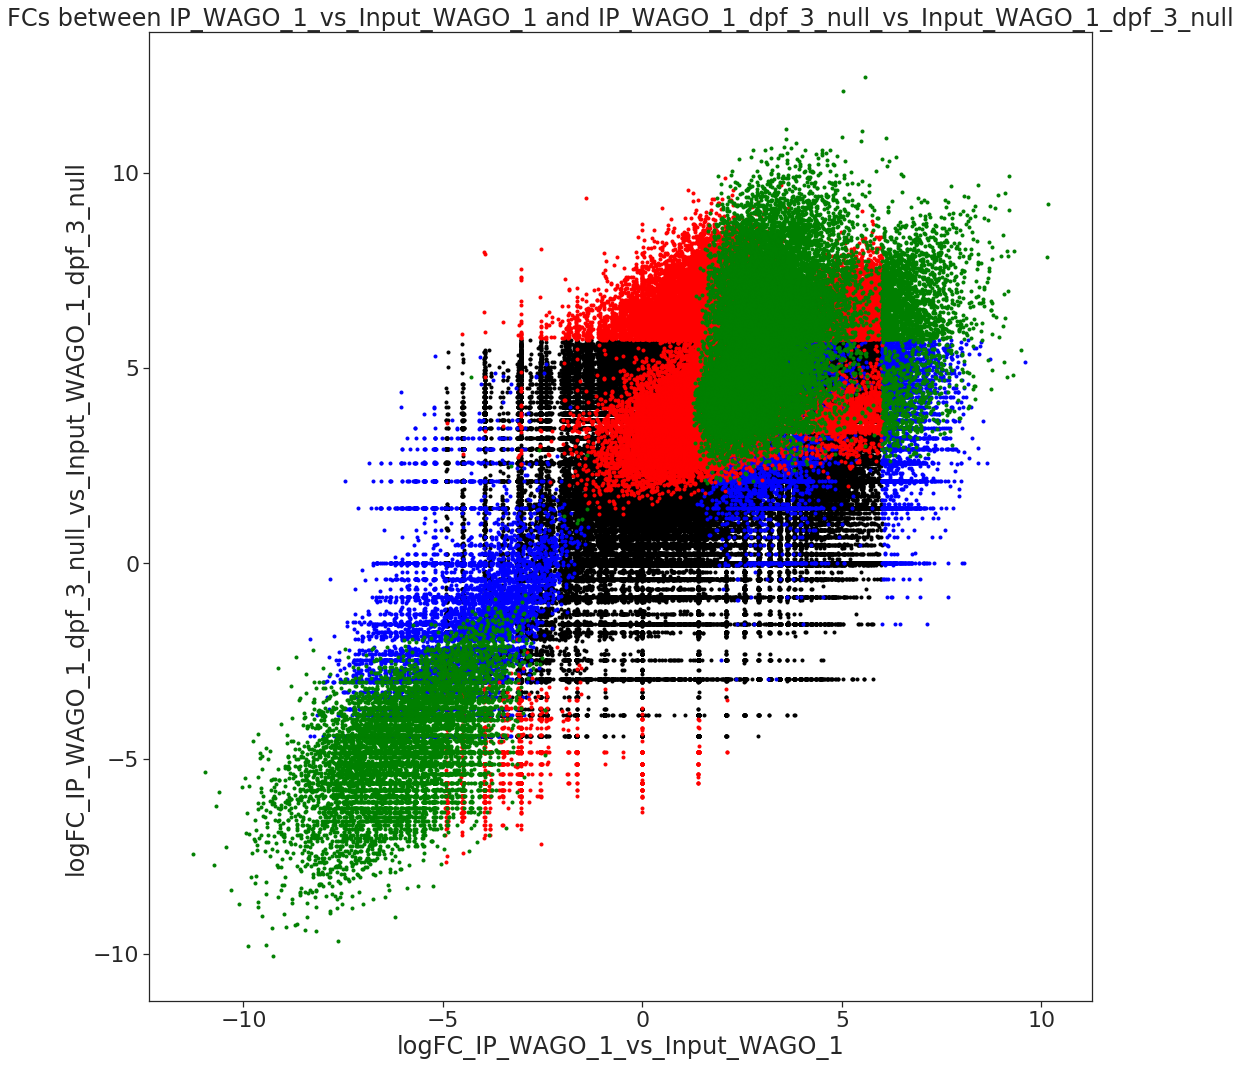

In [11]:
df_1_path = IP_WAGO_1_vs_Input_WAGO_1
df_1_name = IP_WAGO_1_vs_Input_WAGO_1_name

df_2_path = IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null
df_2_name = IP_WAGO_1_dpf_3_null_vs_Input_WAGO_1_dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05),
            "Significant"] = f"FDR_{df_1_name}<0.05"


df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05),
            "Significant"] = f"FDR_{df_2_name}<0.05"


df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"FDR_{df_2_name}"]<0.05), 
           "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"

plot_FC_correlation(df_all, df_1_name, df_2_name, hue="Significant", hue_order=["No", f"FDR_{df_1_name}<0.05", f"FDR_{df_2_name}<0.05", f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"])

pd.DataFrame(df_all["Significant"].value_counts())